In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#PCA

In [ ]:
# Load the LFW dataset
lfw_dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Get the data and labels
X = lfw_dataset.data
y = lfw_dataset.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(lfw_dataset.target_names)
print(y[:5])

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
[5 6 3 1 0]


In [ ]:
#Each row of this matrix corresponds to an image, and each column represents a feature or pixel value in the image
print("{}\n".format(len(X[0])))
print("{}\n".format(len(X.T[0])))
print(X[:5,:5])

1850

1288

[[0.9973857  0.99607843 0.9921568  0.96601313 0.75816995]
 [0.14771242 0.19738562 0.1751634  0.19215687 0.38562092]
 [0.34379086 0.39477125 0.49150327 0.5555556  0.59738564]
 [0.04705882 0.01699346 0.02352941 0.01699346 0.03137255]
 [0.47189546 0.45882353 0.4862745  0.4993464  0.49411765]]


In [ ]:
lfw_dataset.data[0].reshape(lfw_dataset.images.shape[1:])
lfw_dataset.images.shape

(1288, 50, 37)

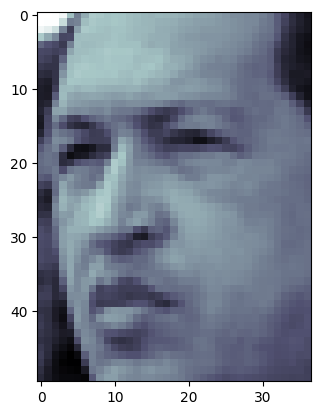

In [ ]:
import matplotlib.pyplot as plt

# Reshape the first image to its original dimensions
first_image = lfw_dataset.data[0].reshape(lfw_dataset.images.shape[1:])

# Display the first image
plt.imshow(first_image, cmap=plt.cm.bone)
plt.show()

In [ ]:
# Perform PCA for dimension reduction
n_components = 150  # You can choose a different number of components
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')

'''
class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0,
                                iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
whiten: correlated principal variances if False
svd(singular value decompose)
'''

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a classifier, for example, a Support Vector Machine (SVM)
classifier = SVC(kernel='rbf', class_weight='balanced')
classifier2 = SVC(kernel='rbf', class_weight='balanced')

classifier.fit(X_train_pca, y_train)
classifier2.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_pca)
y_pred2= classifier2.predict(X_test)

# Evaluate the classifier
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=lfw_dataset.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred2, target_names=lfw_dataset.target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Classification Report:
                    precision    recall  f1-score   support

     Ariel Sharon       1.00      0.62      0.76        13
     Colin Powell       0.65      0.95      0.77        60
  Donald Rumsfeld       0.85      0.63      0.72        27
    George W Bush       0.91      0.92      0.92       146
Gerhard Schroeder       0.90      0.76      0.83        25
      Hugo Chavez       1.00      0.47      0.64        15
       Tony Blair       0.97      0.78      0.86        36

         accuracy                           0.84       322
        macro avg       0.90      0.73      0.78       322
     weighted avg       0.87      0.84      0.84       322

Confusion Matrix:
 [[  8   4   0   1   0   0   0]
 [  0  57   1   2   0   0   0]
 [  0   6  17   4   0   0   0]
 [  0  11   0 135   0   0   0]
 [  0   2   0   3  19   0   1]
 [  0   5   0   1   2   7   0]
 [  0   3   2   3   0   0  28]]

Classification Report:
                    precision    recall  f1-score   support

  

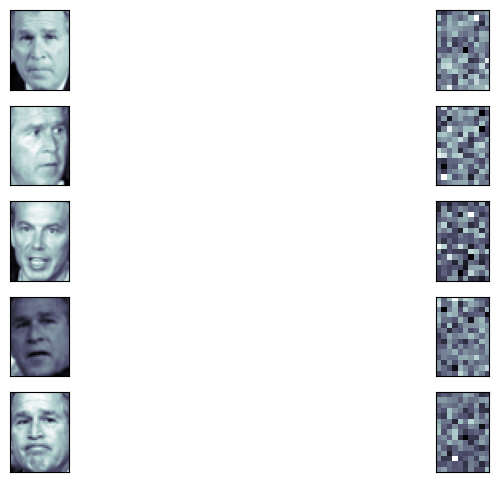

In [ ]:
# Plot a few of the original and reconstructed faces
n_faces = 5
fig, axes = plt.subplots(n_faces, 2, figsize=(10, 6))
for i in range(n_faces):
    ax = axes[i, 0]
    ax.imshow(X_test[i].reshape(lfw_dataset.images.shape[1:]), cmap=plt.cm.bone)
    ax.set_xticks(())
    ax.set_yticks(())

    ax = axes[i, 1]
    ax.imshow(X_test_pca[i].reshape(n_components // 10, 10), cmap=plt.cm.bone)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

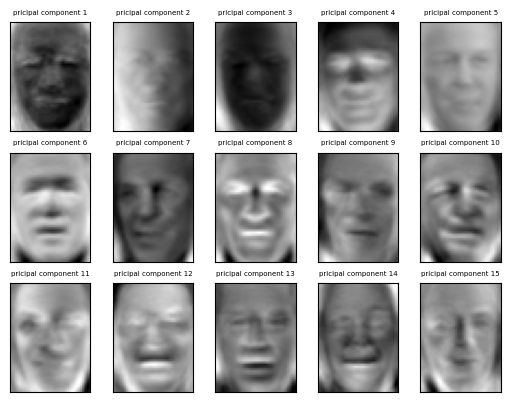

In [ ]:
fig, axes = plt.subplots(3, 5,  subplot_kw={'xticks': (), 'yticks': ()})



for i, (comp, ax) in enumerate(zip(pca.components_, axes.ravel())): # pca.components_와 axes.ravel()을 하나씩 순서대로 할당한 후 인덱스 부여

    ax.imshow(comp.reshape(50,37))

    ax.set_title('pricipal component {}'.format(i+1), fontsize=5) # image title

plt.gray() # 사진 흑백

plt.show() # 사진 출력

In [ ]:
!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.2 MB/s eta 0:00:00


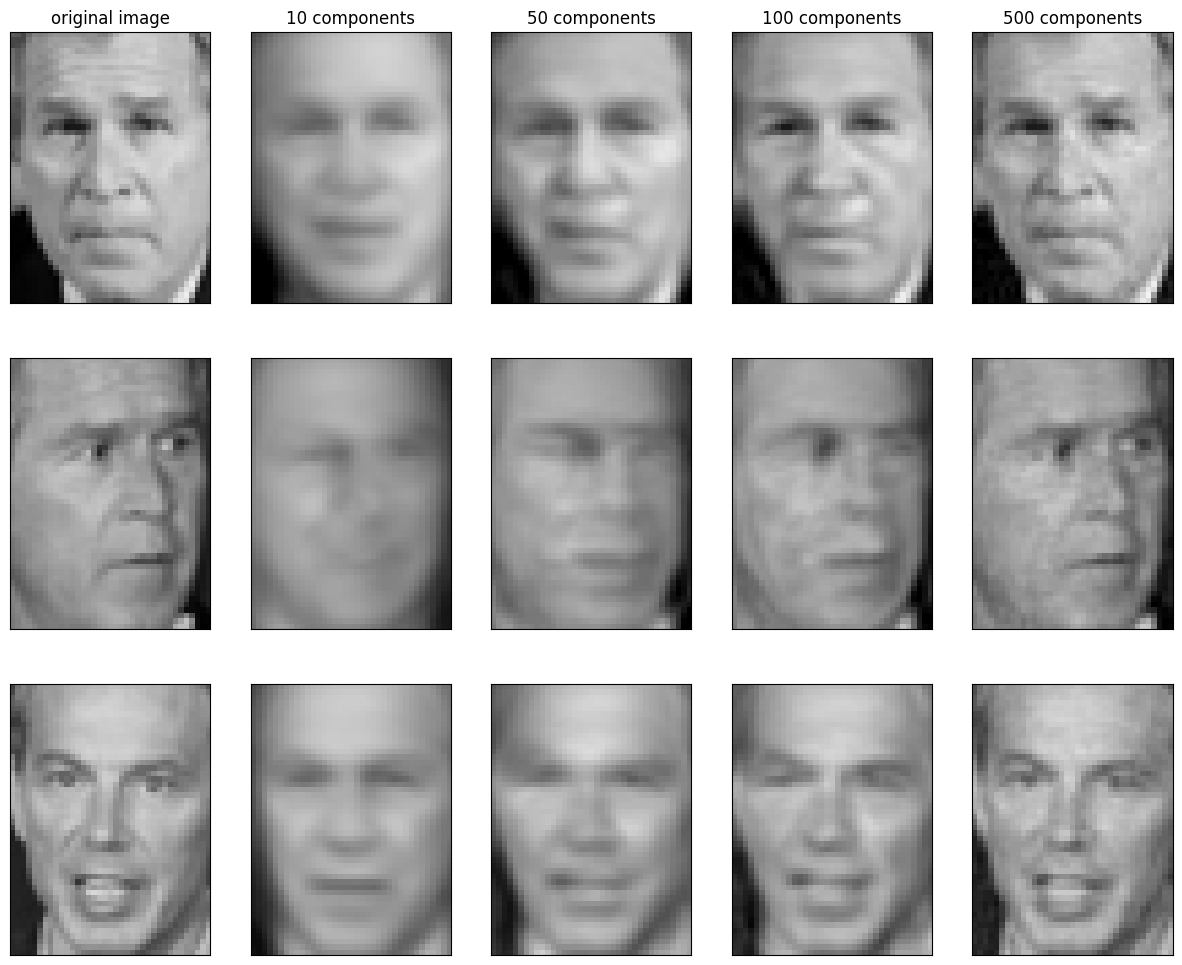

In [ ]:
import mglearn

mglearn.plots.plot_pca_faces(X_train, X_test, (50,37)) # 훈련데이터, 테스트데이터, 이미지크기(87x65)

plt.gray() # 그림 흑백

plt.show() # 그림 출력

#K-means clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


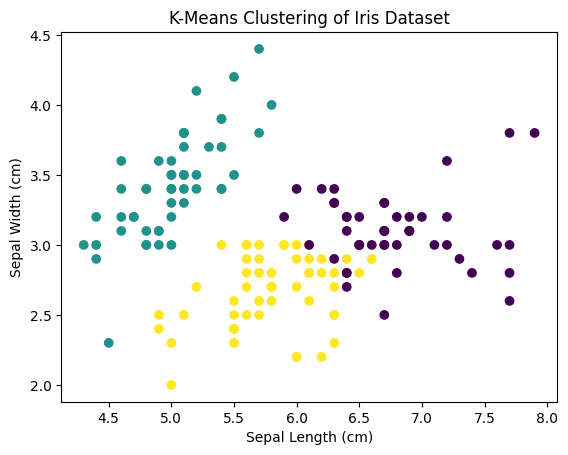

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
data = iris.data

# Standardize the data (important for K-means)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create and fit a KMeans clustering model
n_clusters = 3  # We know there are three species of iris
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

'''
class sklearn.cluster.KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

'''
# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataset for analysis
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Cluster'] = cluster_labels

# Plot the data with color-coded clusters
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c=cluster_labels, cmap='viridis')
plt.title("K-Means Clustering of Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()

Text(0.5, 1.0, 'Real data')

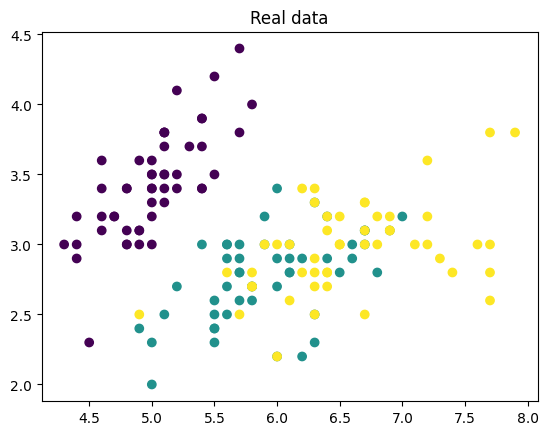

In [ ]:
X=iris.data[:,:]
y=iris.target
plt.scatter(X[:,0], X[:,1], c=y[:], cmap='viridis')
plt.title("Real data")

#Regression

In [ ]:
from sklearn.datasets import load_diabetes
# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

print("Iris feature names:",diabetes.feature_names)
print("\n*********\n")
print("Iris target names:",diabetes.target_filename)
print("\n*********\n")
print("Data shape:",X.shape)
print("\n*********\n")
print("Target shape:",y.shape)
print("\n*********\n")
pd.DataFrame(X,y,diabetes.feature_names)

Iris feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

*********

Iris target names: diabetes_target.csv.gz

*********

Data shape: (442, 10)

*********

Target shape: (442,)

*********



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:,:], y[:], test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Coefficients
print("\nCoefficients:")
for i, coef in enumerate(model.coef_):
    print(f"Feature {i}: {coef}")

# Intercept
print("\nIntercept:", model.intercept_)

Mean Squared Error: 2900.193628493482
R-squared: 0.4526027629719195

Coefficients:
Feature 0: 37.904021350074984
Feature 1: -241.96436231273995
Feature 2: 542.4287585162899
Feature 3: 347.70384391385636
Feature 4: -931.4888458835163
Feature 5: 518.0622769833376
Feature 6: 163.41998299131035
Feature 7: 275.3179015786484
Feature 8: 736.1988589046839
Feature 9: 48.67065743196543

Intercept: 151.34560453985995


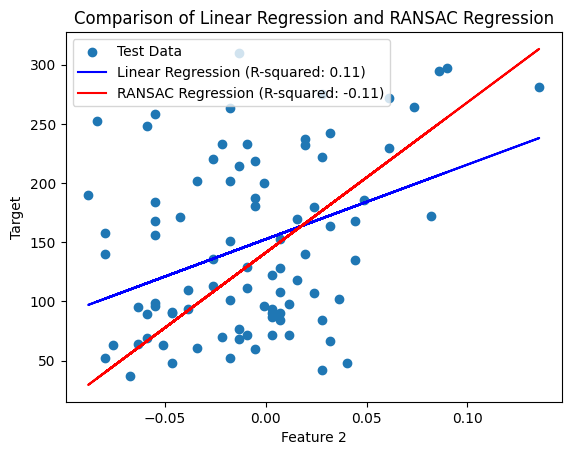

In [ ]:

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a RANSAC linear regression model
ransac = RANSACRegressor(LinearRegression(), random_state=42)
ransac.fit(X_train, y_train)

# Predict using the trained models
y_pred_linear = linear_model.predict(X_test)
y_pred_ransac = ransac.predict(X_test)

# Calculate R-squared (coefficient of determination) for both models
r_squared_linear = r2_score(y_test, y_pred_linear)
r_squared_ransac = r2_score(y_test, y_pred_ransac)

# Plot the original linear regression line and RANSAC regression line
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, y_pred_linear, color='blue', label=f'Linear Regression (R-squared: {r_squared_linear:.2f})')
plt.plot(X_test, y_pred_ransac, color='red', label=f'RANSAC Regression (R-squared: {r_squared_ransac:.2f})')
plt.xlabel(f'Feature {2}')
plt.ylabel('Target')
plt.legend()
plt.title('Comparison of Linear Regression and RANSAC Regression')
plt.show()

[219.  70. 202. 230. 111.] [146.16743235 187.36688807 148.22740514 201.78669757 132.77760924]


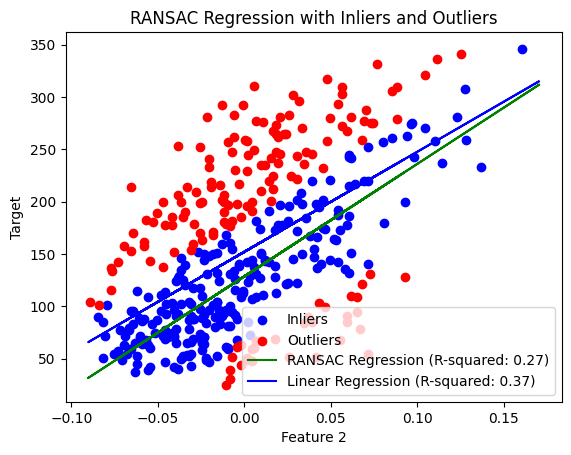

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train a RANSAC linear regression model
ransac = RANSACRegressor(LinearRegression(), random_state=42)
ransac.fit(X_train, y_train)

# Predict using the trained models
y_pred_linear = linear_model.predict(X_test)

# Predict using the trained RANSAC model
y_pred_ransac = ransac.predict(X_test)

# Identify inliers and outliers using the RANSAC model
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Calculate R-squared (coefficient of determination) for RANSAC model
r_squared_linear = r2_score(y_test, y_pred_linear)
r_squared_ransac = r2_score(y_test, y_pred_ransac)
print(y_test[:5],y_pred_linear[:5])
# Plot the data, inliers, and outliers
plt.scatter(X_train[inlier_mask.squeeze()], y_train[inlier_mask], color='blue', label='Inliers')
plt.scatter(X_train[outlier_mask.squeeze()], y_train[outlier_mask], color='red', label='Outliers')
plt.plot(X_test, y_pred_ransac, color='green', label=f'RANSAC Regression (R-squared: {r_squared_ransac:.2f})')
plt.plot(X_test, y_pred_linear, color='blue', label=f'Linear Regression (R-squared: {r_squared_linear:.2f})')

plt.xlabel(f'Feature {2}')
plt.ylabel('Target')
plt.legend()
plt.title('RANSAC Regression with Inliers and Outliers')
plt.show()

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)